In [1]:
from utils.libraries import *
from utils.objects import *
from utils.functions import *
from definitions import *
from Economic_Market_Forecasting_ML_V2 import *

In [2]:
EMF_ml = Economic_Market_Forecasting()

In [3]:
ROOT_PATH = Path(ROOT_PATH)
data_path = "data/result/processed_data"
predict_path = "data\result\prediction_data"
DATA_PATH = ROOT_PATH.joinpath("data\result") # r"C:\Users\Joan Oliver\Documents\GitHub\EMF_project\data"
PREDICT_PATH = ROOT_PATH.joinpath(predict_path)
config_paths = [
    "config\Market_Data_Config.csv",
    "config\Economic_Data_Config.csv",
    "config\Calc_Data_Config.csv"
]
market_config = ROOT_PATH.joinpath(config_paths[0])
economic_config = ROOT_PATH.joinpath(config_paths[1]).abspath()
calc_config = ROOT_PATH.joinpath(config_paths[2]).abspath()

target_list = pd.read_csv(market_config, sep=";", header=0).loc[:, "Market"].to_list()
ticker_list = pd.read_csv(market_config, sep=";", header=0).loc[:, "Codigo"].to_list()

# target_list = ['SP500', 'Gold', 'CorporateBonds']

In [4]:
model_pred = {}
y_pred = {}
y_test = {}
top_model = {}
full_test = {}
future_preds = {}


for target, ticker in zip(target_list, ticker_list):
    print("\n"+">>Target: "+target+"\n")
    model_pred[target], y_pred[target], y_test[target], top_model[target], full_test[target], future_preds[target] = EMF_ml.Economic_Market_Forecasting_ML(
                                                                                                                                     years=20, 
                                                                                                                                     period="W",
                                                                                                                                     date=datetime.today()-dt.timedelta(days=1),
                                                                                                                                     root_path=ROOT_PATH, 
                                                                                                                                     target=target,
                                                                                                                                     ticker=ticker,
                                                                                                                                     accepted_importance=0.8,
                                                                                                                                     cross_val=5, 
                                                                                                                                     data_path=DATA_PATH)
    break


>>Target: SP500

SP500 prediction does not exist: prediction_SP500_20231006.csv
SP500 extraction does not exist: processed_data_SP500_20231006.csv
> Load the market data config
> Load the economic data config
> Setting up the indicator dictionaries
> Extracting the indicator data
   -->Extracting 10-Year Treasury Yield...
   -->Extracting 2-Year Treasury Yield...
   -->Extracting Federal Funds Effective Rate...
   -->Extracting 1-Month Treasury Yield...
   -->Extracting 3-Month Treasury Yield...
   -->Extracting 5-Year Treasury Yield...
   -->Extracting 20-Year Treasury Yield...
   -->Extracting 30-Year Treasury Yield...
   -->Extracting 15-Year Mortgage Rate...
   -->Extracting 30-Year Mortgage Rate...
   -->Extracting 10-Year Euro Gov Bond Yield...
   -->Extracting 3-Month Euro Gov Bond Yield...
   -->Extracting 3-Month China Gov Bond Yield...
   -->Extracting 10-Year India Gov Bond Yield...
   -->Extracting CPI...
   -->Extracting PPI...
   -->Extracting China CPI...
   -->Extracti

KeyboardInterrupt: 

# Pruebas

In [ ]:
datetime.today()-dt.timedelta(days=1)

datetime.datetime(2023, 9, 30, 12, 48, 12, 270970)

In [9]:
df = pd.read_csv(r"C:\Users\Joan Oliver\Documents\GitHub\Economic_Market_Forecasting\Economic_Market_Forecasting\EMF_webapp\src\data\result\prediction_data\2023\202309\20230930\prediction_Technology_20230930.csv",
                 index_col=0)

In [10]:
df_prediction = (df.loc[:,df.columns.str.contains("Prediction")]-df.loc[:,df.columns.str.contains("Prediction")].dropna().iloc[0,0])

<AxesSubplot:xlabel='Date'>

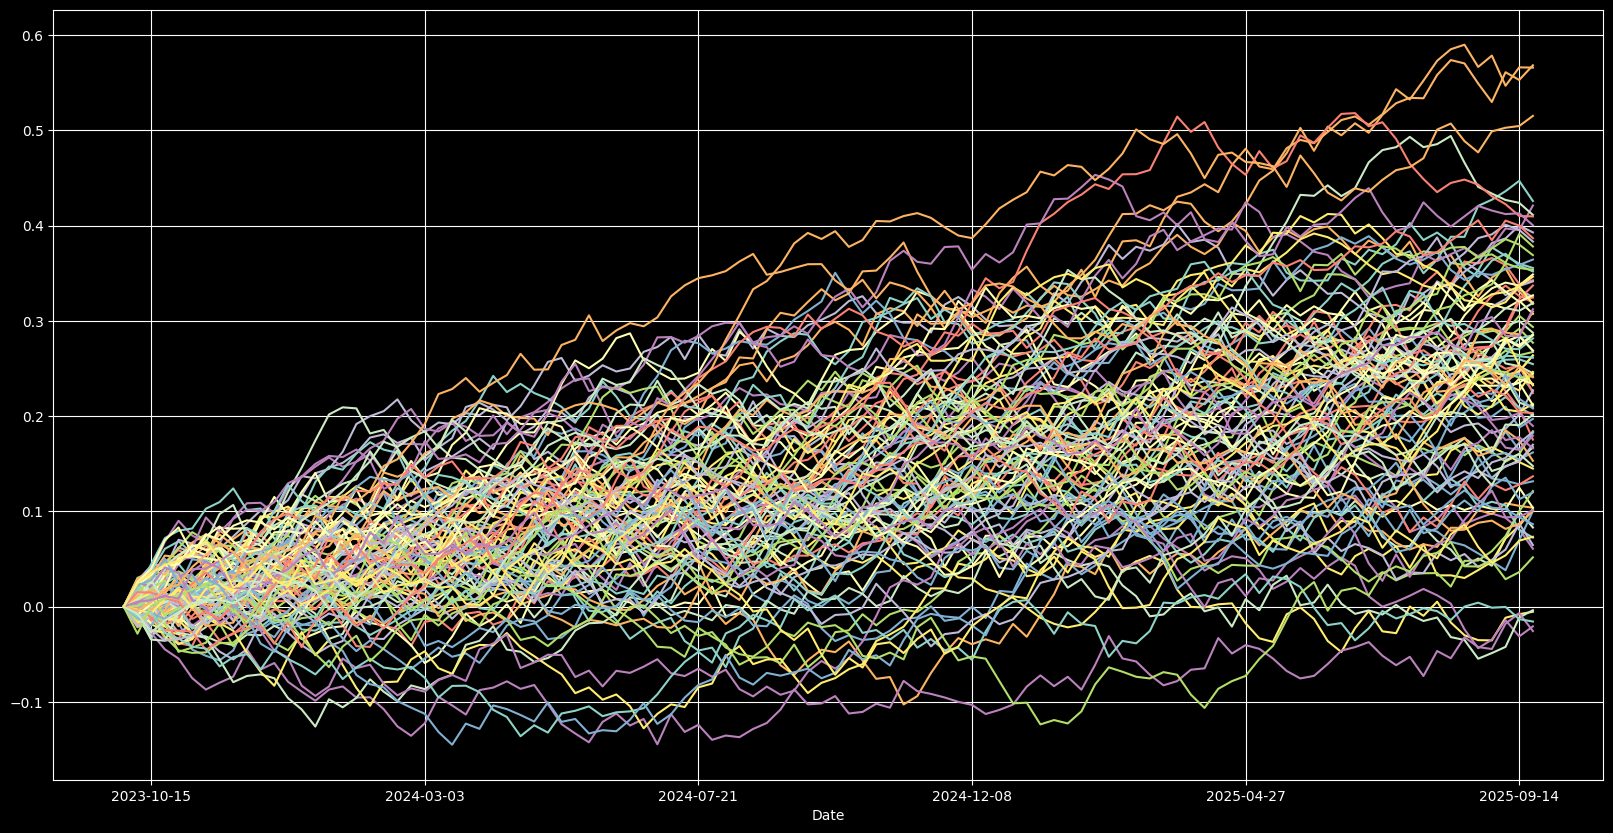

In [18]:
df_prediction.plot(figsize=(20,10), legend=False, grid=True)

In [ ]:
df_quartil = pd.DataFrame()
for n in np.linspace(0,1,5):
    print(round(n,2), df_prediction.quantile(n, axis=1).mean(), df_prediction.quantile(n, axis=1).std())
    df_quartil[target+"_"+str(int(n*100))] = df_prediction.quantile(round(n,2),axis=1)

0.0 -0.19319936210421662 0.06169761480089068
0.25 0.013501732371341727 0.027929653417730224
0.5 0.08115247571471557 0.04907290111174393
0.75 0.1505127052390124 0.07791825734661238
1.0 0.3551466407806742 0.171533362042495


<AxesSubplot:xlabel='Date'>

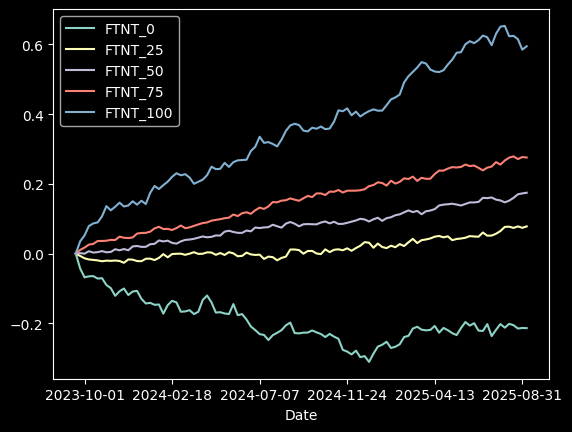

In [ ]:
df_quartil.plot()

In [5]:
cutoff_date=(datetime.today() - dt.timedelta(days=1)).strftime('%Y-%m-%d')
Ymd_str = (datetime.today() - dt.timedelta(days=1)).strftime('%Y%m%d')
Ym_str = (datetime.today() - dt.timedelta(days=1)).strftime('%Y%m')
Y_str = (datetime.today() - dt.timedelta(days=1)).strftime('%Y')
target = "SP500"
cutoff_date

'2023-09-30'

In [21]:
for target in target_list:
    try:
        print("\n"+">>Target: "+target)
        path = f"../data/result/prediction_data/{Y_str}/{Ym_str}/{Ymd_str}/"
        globals()["df_full_"+str(target)] = pd.read_csv(f"{path}prediction_{target}_{Ymd_str}.csv",index_col=0)
        globals()["df_pred_"+str(target)] = (globals()["df_full_"+str(target)].loc[:,globals()["df_full_"+str(target)].columns.str.contains("Prediction")]-globals()["df_full_"+str(target)].loc[:,globals()["df_full_"+str(target)].columns.str.contains("Prediction")].dropna().iloc[0,0])
        globals()["df_quartil_"+str(target)] = pd.DataFrame()
        for n in np.linspace(0,1,5):
            print(f"Quartil: {round(n,2)}, Mean: {round(globals()['df_pred_'+str(target)].quantile(n, axis=1).mean(),2)}, Std: {round(globals()['df_pred_'+str(target)].quantile(n, axis=1).std(),2)}")
            globals()["df_quartil_"+str(target)][target+"_"+str(int(n*100))] = globals()["df_pred_"+str(target)].quantile(round(n,2),axis=1)
            

    except:
        pass
for n in np.linspace(0,1,5):
    quant = str(int(n*100))
    globals()[f"df_{quant}_pred"] = pd.DataFrame()
    for target in target_list:
        try:
            globals()[f"df_{quant}_pred"][target] = globals()["df_quartil_"+str(target)][f"{target}_{str(int(n*100))}"]    
        except:
            pass
    


>>Target: SP500
Quartil: 0.0, Mean: -0.16, Std: 0.04
Quartil: 0.25, Mean: 0.01, Std: 0.02
Quartil: 0.5, Mean: 0.07, Std: 0.04
Quartil: 0.75, Mean: 0.14, Std: 0.08
Quartil: 1.0, Mean: 0.34, Std: 0.13

>>Target: Dow_Jones
Quartil: 0.0, Mean: -0.18, Std: 0.06
Quartil: 0.25, Mean: 0.03, Std: 0.04
Quartil: 0.5, Mean: 0.1, Std: 0.06
Quartil: 0.75, Mean: 0.17, Std: 0.08
Quartil: 1.0, Mean: 0.35, Std: 0.17

>>Target: NASDAQ
Quartil: 0.0, Mean: -0.03, Std: 0.06
Quartil: 0.25, Mean: 0.13, Std: 0.09
Quartil: 0.5, Mean: 0.19, Std: 0.11
Quartil: 0.75, Mean: 0.25, Std: 0.14
Quartil: 1.0, Mean: 0.41, Std: 0.18

>>Target: Energy
Quartil: 0.0, Mean: -0.01, Std: 0.02
Quartil: 0.25, Mean: 0.06, Std: 0.04
Quartil: 0.5, Mean: 0.08, Std: 0.05
Quartil: 0.75, Mean: 0.11, Std: 0.06
Quartil: 1.0, Mean: 0.19, Std: 0.09

>>Target: Financials
Quartil: 0.0, Mean: 0.0, Std: 0.05
Quartil: 0.25, Mean: 0.1, Std: 0.07
Quartil: 0.5, Mean: 0.14, Std: 0.08
Quartil: 0.75, Mean: 0.17, Std: 0.09
Quartil: 1.0, Mean: 0.25, Std

In [37]:
df_quartil_Technology.iloc[-1,:].sort_values(ascending=False).index.str.split("_").str[1]

Index(['100', '75', '50', '25', '0'], dtype='object')

In [38]:
df_2yr_pred = pd.DataFrame()
for target in target_list:
    try:
        df_2yr_pred[target] = pd.DataFrame(globals()["df_quartil_"+str(target)].iloc[-1,:].sort_values(ascending=False).values,
                                           index=globals()["df_quartil_"+str(target)].iloc[-1,:].sort_values(ascending=False).index.str.split("_").str[1],
                                           columns=[target])
    except:
        pass


In [47]:
df_2yr_pred

,SP500,NASDAQ,Energy,Financials,Utilities,Industrials,Technology,Healthcare,Discretionary,Staples,Materials,RealEstate,Gold
100,0.497875,0.751654,0.327489,0.425457,0.378404,0.278571,0.568129,0.435740,0.421099,0.349590,0.250324,0.278686,0.212873
75,0.272552,0.468492,0.203445,0.325572,0.246822,0.159462,0.320808,0.287079,0.292021,0.259174,0.050618,0.156623,0.107839
50,0.141203,0.385721,0.165625,0.277145,0.188150,0.086244,0.241330,0.218557,0.243953,0.203353,-0.022134,0.106990,0.053892
25,0.060370,0.290182,0.123280,0.212796,0.130061,-0.000384,0.159709,0.169845,0.206017,0.161007,-0.071100,0.076468,0.011303
0,-0.177920,0.067562,0.042845,0.099065,0.024866,-0.160275,-0.025585,0.009821,0.081873,0.039578,-0.190097,-0.019404,-0.124540


TypeError: only size-1 arrays can be converted to Python scalars

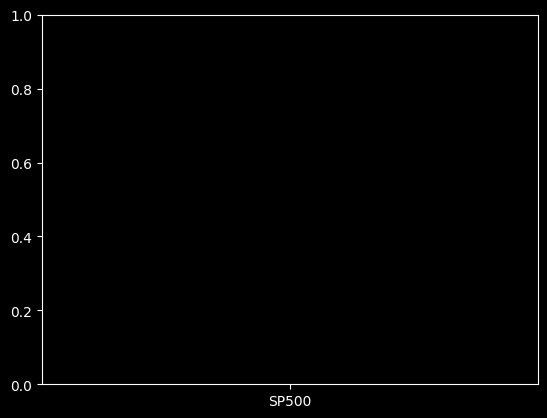

In [53]:
plt.bar(df_2yr_pred.columns, df_2yr_pred.values)

In [31]:
df_2yr_pred = pd.DataFrame()
for n in np.linspace(0,1,5):
    quant = str(int(n*100))
    df_2yr_pred[f"{str(int(n*100))}_Percentil"] = globals()["df_{quant}_pred"][-1,:]

df_2yr_pred = pd.DataFrame(df_0_pred.iloc[-1,:].sort_values(ascending=False).values, index=df_0_pred.iloc[-1,:].sort_values(ascending=False).index,columns=["0-Percentil"])
df_2yr_pred

,0-Percentil
Financials,0.099065
Discretionary,0.081873
NASDAQ,0.067562
Energy,0.042845
Staples,0.039578
Utilities,0.024866
Healthcare,0.009821
RealEstate,-0.019404
Technology,-0.025585
Gold,-0.124540


<AxesSubplot:xlabel='Date'>

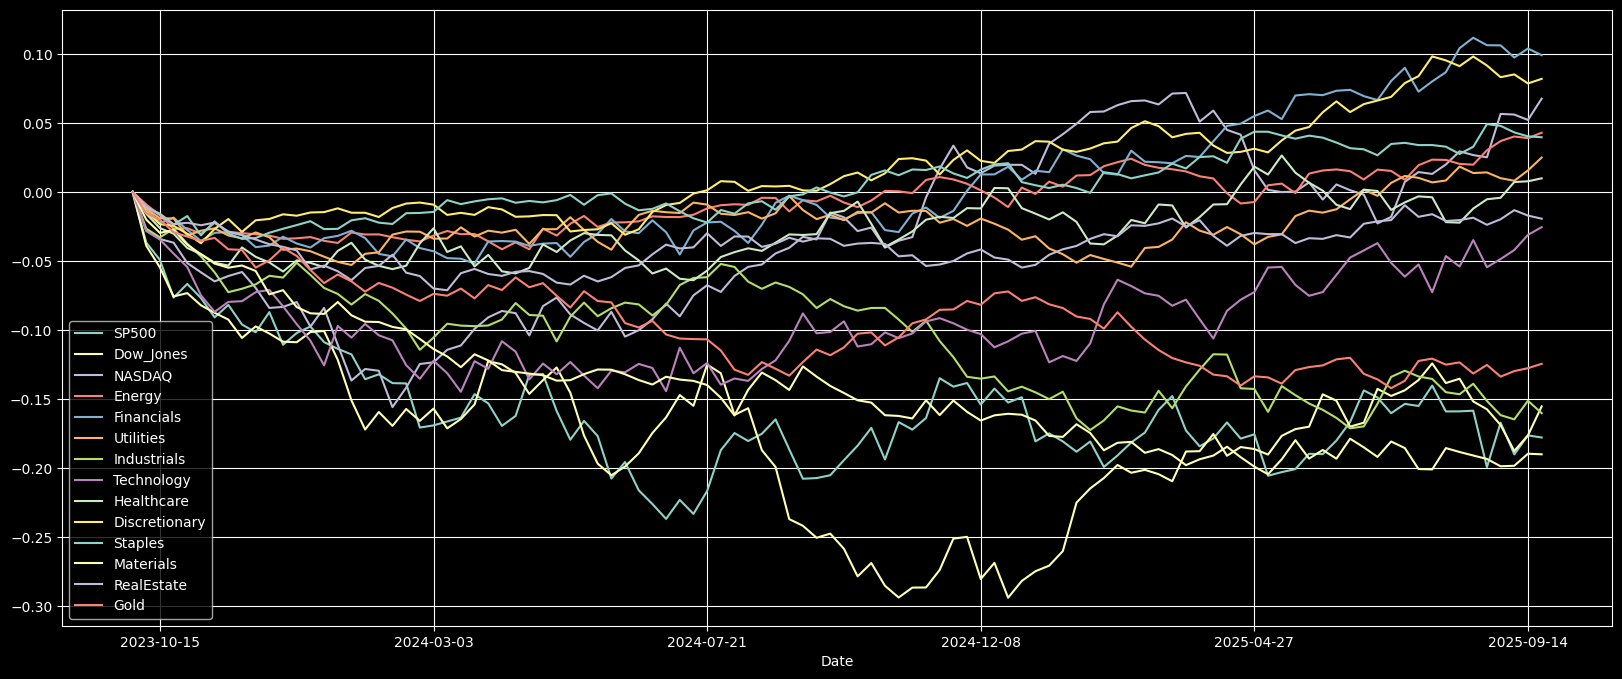

In [26]:
df_0_pred.plot(figsize=(20,8), legend=True, grid=True)

In [ ]:

for n in np.linspace(0,1,5):
    quant = str(int(n*100))
    globals()[f"df_{quant}_pred"] = pd.DataFrame()
    for target in target_list:
        globals()[f"df_{quant}_pred"][target] = globals()["df_quartil_"+str(target)][f"{target}_{str(int(n*100))}"]


In [ ]:
df_25_pred.iloc[-1,:].sort_values(ascending=False)

NASDAQ            0.242396
Financials        0.213478
Healthcare        0.183652
Discretionary     0.181388
Staples           0.162517
Energy            0.140071
Utilities         0.129376
FTNT              0.126944
RealEstate        0.109088
Technology        0.103781
HighDividend      0.095018
SP500             0.077826
CorporateBonds    0.059302
Gold             -0.010402
Industrials      -0.021201
Dow_Jones        -0.036133
Materials        -0.067967
Name: 2025-09-07, dtype: float64